In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import pickle

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn import preprocessing

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV,TimeSeriesSplit,HalvingGridSearchCV
from sklearn.svm import SVR



In [2]:
df_train=pd.read_csv("/Users/luca/Desktop/GEFCom2014 Data/Load/L-train.csv")

y_train=df_train["LOAD"]
X_train=df_train[["DAY","MONTH","HOUR","DAY_OF_WEEK","IS_HOLIDAY","w_avg"]]

df_test=pd.read_csv(f"/Users/luca/Desktop/GEFCom2014 Data/Load/Task 1/L1-test_clean.csv")

X_test=df_test[["DAY",  "MONTH",  "HOUR",  "DAY_OF_WEEK",  "IS_HOLIDAY",  "w_avg"]]
y_test=df_test["LOAD"]

In [3]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# init model
svr_blueprint=SVR(kernel="linear")

C_grid = {"C":[100,1000,10,1]}

In [5]:
# 15 minutes to run

# svr=HalvingGridSearchCV(svr_blueprint, C_grid,scoring="neg_mean_squared_error").fit(X_train_scaled, y_train)
svr=pickle.load(open('/Users/luca/Desktop/ThesisKernelMethods/experiments/point/models/svr_load.pkl', 'rb'))

In [6]:
# pickle.dump(svr, open('/Users/luca/Desktop/ThesisKernelMethods/experiments/point/models/svr_load.pkl', 'wb'))


In [7]:
y_hat=svr.predict(X_test_scaled)

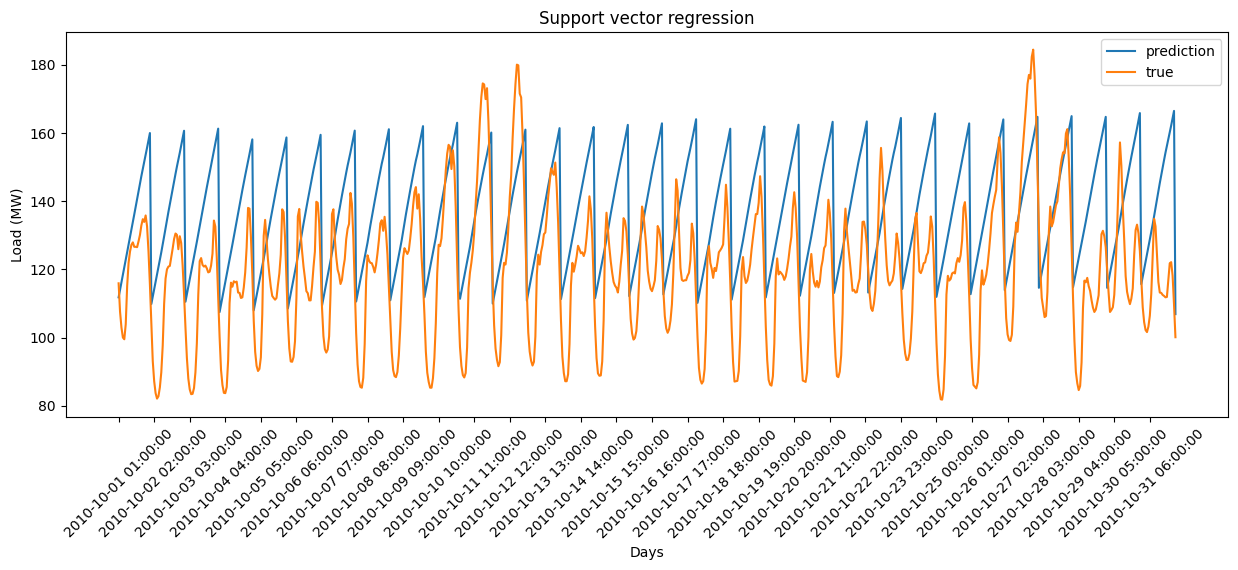

In [8]:
plt.figure(figsize=(15,5))
plt.plot(y_hat, label="prediction")
plt.plot(df_test["DS"], y_test, label="true")
plt.xticks(np.arange(0,len(y_test)+1,25),rotation=45)

plt.xlabel("Days")
plt.ylabel("Load (MW)")
plt.title("Support vector regression")
plt.legend()
plt.show()

In [9]:
np.sqrt(mean_squared_error(y_test, y_hat))

23.242149951408255